{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-05-31 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-05-31 19:55:00': {'1. open': '166.8100', '2. high': '166.9600', '3. low': '166.8100', '4. close': '166.9000', '5. volume': '365'}, '2024-05-31 19:50:00': {'1. open': '166.9600', '2. high': '166.9600', '3. low': '166.9600', '4. close': '166.9600', '5. volume': '10'}, '2024-05-31 19:25:00': {'1. open': '166.8500', '2. high': '166.8500', '3. low': '166.8500', '4. close': '166.8500', '5. volume': '1'}, '2024-05-31 19:20:00': {'1. open': '166.9600', '2. high': '166.9600', '3. low': '166.8100', '4. close': '166.8100', '5. volume': '7'}, '2024-05-31 19:05:00': {'1. open': '166.8500', '2. high': '166.8500', '3. low': '166.8500', '4. close': '166.8500', '5. volume': '12'}, '2024-05-31 19:00:00': {'1. open': '166.8500', '2. high': 

,1. open,2. high,3. low,4. close,5. volume
2024-05-31 19:55:00,166.8100,166.9600,166.8100,166.9000,365
2024-05-31 19:50:00,166.9600,166.9600,166.9600,166.9600,10
2024-05-31 19:25:00,166.8500,166.8500,166.8500,166.8500,1
2024-05-31 19:20:00,166.9600,166.9600,166.8100,166.8100,7
2024-05-31 19:05:00,166.8500,166.8500,166.8500,166.8500,12
...,...,...,...,...,...
2024-05-31 11:15:00,164.8150,164.8150,164.5100,164.5250,18007
2024-05-31 11:10:00,164.5500,164.7600,164.4750,164.7300,14879
2024-05-31 11:05:00,164.4300,164.5800,164.4100,164.5450,20863
2024-05-31 11:00:00,164.6100,164.6800,164.3450,164.4180,18729


TypeError: unhashable type: 'numpy.ndarray'

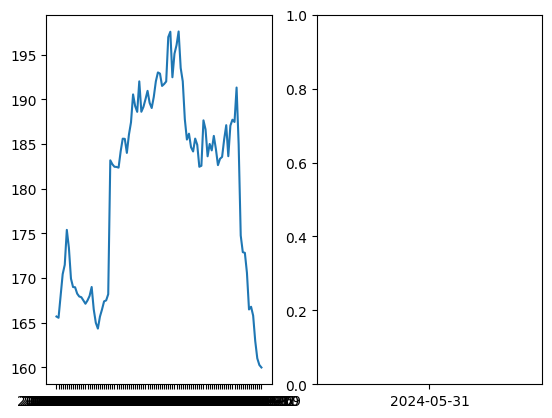

In [28]:
import json
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query/'
params = {
    'function':'TIME_SERIES_DAILY',
    'symbol':'IBM',
    'apikey':'SDV5SJFOSR021TOU'
}

daily_response = requests.get(url, params=params)
daily_data = json.loads(daily_response.text)

params = {
    'function':'TIME_SERIES_INTRADAY',
    'symbol':'IBM',
    'interval':'5min',
    'apikey':'SDV5SJFOSR021TOU'
}

intraday_response = requests.get(url, params=params)
intraday_data = json.loads(intraday_response.text)

print(json.loads(intraday_response.text))
print(json.loads(daily_response.text))

daily_stocks = daily_data['Time Series (Daily)']
intraday_stocks = intraday_data[f"Time Series ({params['interval']})"]

fig, axes = plt.subplots(1, 2)

df = pd.DataFrame.from_dict(daily_stocks, orient='index')
df.columns = ['open', 'high', 'low', 'close', 'volume']
df = df.astype('float')
axes[0].plot(df.index, df['open'])

df_2 = pd.DataFrame.from_dict(intraday_stocks, orient='index')
display(df_2)
df_2.columns = ['open', 'high', 'low', 'close', 'volume']
axes[1].plot(df.index, df_2[['open', 'close']])

plt.show()
time.sleep(5)

In [19]:
url = 'https://api.twelvedata.com/time_series'
params = {
    'apikey':'f19b492f9b2345e9bba45f512792e339',
    'symbol':'NKE',
    'interval':'1day'
}
response = requests.get(url, params=params)
data = json.loads(response.text)
print(json.dumps(data, indent=2))
print(data['values'][-1])

{
  "meta": {
    "symbol": "NKE",
    "interval": "1day",
    "currency": "USD",
    "exchange_timezone": "America/New_York",
    "exchange": "NYSE",
    "mic_code": "XNYS",
    "type": "Common Stock"
  },
  "values": [
    {
      "datetime": "2024-05-28",
      "open": "91.68000",
      "high": "92.51500",
      "low": "91.35000",
      "close": "91.90500",
      "volume": "4653750"
    },
    {
      "datetime": "2024-05-24",
      "open": "91.77000",
      "high": "92.20000",
      "low": "91.49000",
      "close": "91.75000",
      "volume": "6936800"
    },
    {
      "datetime": "2024-05-23",
      "open": "92.45000",
      "high": "92.58000",
      "low": "91.15000",
      "close": "91.40000",
      "volume": "7729000"
    },
    {
      "datetime": "2024-05-22",
      "open": "91.95000",
      "high": "92.76000",
      "low": "91.65000",
      "close": "92.50000",
      "volume": "7611900"
    },
    {
      "datetime": "2024-05-21",
      "open": "91.57000",
      "high": "

In [21]:
%pip install yfinance



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 10.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 12.6 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 MB 13.1 MB/s eta 0:00:01
     ----------------------------- ---------- 2.2/3.0 MB 12.8 MB/s eta 0:00:01
     ------------------------------------- -- 2.8/3.0 MB 12.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 k

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

msft = yf.Ticker("MSFT")
msft.info
msft.info['currentPrice']

411.36

In [56]:
df2 = pd.DataFrame(columns=[1, 2, 3, 4])
df2.loc[len(df2)] = [1, 2, 3, 4]
print(df2)
print(df2.index[0])

   1  2  3  4
0  1  2  3  4
0


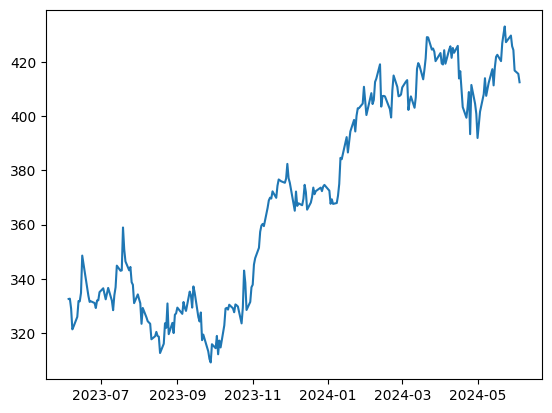

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1717531201,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 416.07,
 'fiftyTwoWeekHigh': 416.44,
 'fiftyTwoWeekLow': 409.675,
 'regularMarketDayHigh': 416.44,
 'regularMarketDayLow': 409.675,
 'regularMarketVolume': 13557826,
 'chartPreviousClose': 335.4,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'end': 1717594200,
   'start': 1717574400,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'end': 1717617600,
   'start': 1717594200,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'end': 1717632000,
   'start': 1717617600,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1y',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-33660000.0,-29160000.0,-20700000.0,20855987.382214,30780000.0,NaN
Tax Rate For Calcs,0.18,0.18,0.18,0.187892,0.19,NaN
Normalized EBITDA,33741000000.0,33556000000.0,31845000000.0,28972000000.0,26556000000.0,NaN
Total Unusual Items,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN
Total Unusual Items Excluding Goodwill,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,21939000000.0,21870000000.0,22291000000.0,20081000000.0,18299000000.0,NaN
Reconciled Depreciation,6027000000.0,5959000000.0,3921000000.0,3874000000.0,3549000000.0,NaN
Reconciled Cost Of Revenue,18505000000.0,19623000000.0,16302000000.0,16795000000.0,16128000000.0,NaN
EBITDA,33554000000.0,33394000000.0,31730000000.0,29083000000.0,26718000000.0,NaN
EBIT,27527000000.0,27435000000.0,27809000000.0,25209000000.0,23169000000.0,NaN


,period,strongBuy,buy,hold,sell,strongSell
0,0m,14,13,6,0,1
1,-1m,23,32,3,0,0
2,-2m,23,31,3,0,0
3,-3m,20,27,6,0,0


C:\Users\porro\AppData\Local\Temp\ipykernel_64252\56595893.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.69' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_data.iloc[i, 6] = quarterly_financials.loc['Diluted EPS', col]


,Open,High,Low,Close,Change,Volume,EPS
Date,,,,,,,
2023-06-05 00:00:00-04:00,332.618046,335.932117,332.062395,333.332458,0.714413,21307100,2.69
2023-06-06 00:00:00-04:00,332.727152,332.766850,329.591707,331.089966,-1.637187,20396200,2.69
2023-06-07 00:00:00-04:00,329.075732,331.893684,319.996760,320.869934,-8.205797,40717100,2.69
2023-06-08 00:00:00-04:00,321.425590,324.104645,320.840173,322.735352,1.309761,23277700,2.69
2023-06-09 00:00:00-04:00,322.467432,327.428623,321.891948,324.253479,1.786047,22514900,2.69
...,...,...,...,...,...,...,...
2024-05-29 00:00:00-04:00,425.690002,430.940002,425.690002,429.170013,3.480011,15517100,2.94
2024-05-30 00:00:00-04:00,424.299988,424.299988,414.239990,414.670013,-9.629974,28424800,2.94
2024-05-31 00:00:00-04:00,416.750000,416.750000,404.510010,415.130005,-1.619995,47995300,2.94


252


In [59]:
hist = msft.history(period="1y")
plt.plot(hist.index, hist['Open'])
plt.show()
hist['Change'] = hist['Close'] - hist['Open']
hist_metadata = msft.history_metadata
display(hist_metadata)
quarterly_financials = msft.quarterly_financials
display(quarterly_financials)
display(msft.recommendations)
hist

stock_data = hist[['Open', 'High', 'Low', 'Close', 'Change', 'Volume']].copy()
stock_data['EPS'] = 0


for i in range(len(stock_data)):
    cols = quarterly_financials.columns
    tz_aware_cols = cols.tz_localize('America/New_York')

    for j, col in enumerate(cols):
        if j == 0:
            if stock_data.index[i] > tz_aware_cols[j]:
                stock_data.iloc[i, 6] = quarterly_financials.loc['Diluted EPS', col]
                break
        elif j == len(cols) - 1:
            if stock_data.index[i] < tz_aware_cols[j]:
                stock_data.iloc[i, 6] = quarterly_financials.loc['Diluted EPS', col]
                break
        else:
            if stock_data.index[i] < tz_aware_cols[j] and stock_data.index[i] > tz_aware_cols[j+1]:
                stock_data.iloc[i, 6] = quarterly_financials.loc['Diluted EPS', col]
                break

            
display(stock_data)
print(len(stock_data))

In [85]:
quarterly_financials.loc['Diluted EPS', ]

2024-03-31    2.94
2023-12-31    2.93
2023-09-30    2.99
2023-06-30    2.69
2023-03-31    2.45
2022-12-31     NaN
Name: Diluted EPS, dtype: object

In [18]:
msft.major_holders

Breakdown,Value
insidersPercentHeld,0.00054
institutionsPercentHeld,0.73743
institutionsFloatPercentHeld,0.73782
institutionsCount,6851.00000


In [19]:
msft.upgrades_downgrades

,Firm,ToGrade,FromGrade,Action
GradeDate,,,,
2024-05-24 14:38:35,RBC Capital,Outperform,Outperform,reit
2024-05-22 16:21:14,Wedbush,Outperform,Outperform,reit
2024-05-17 17:46:16,Macquarie,Outperform,Outperform,main
2024-05-17 15:43:17,RBC Capital,Outperform,Outperform,main
2024-04-26 18:25:08,Wells Fargo,Overweight,Overweight,main
...,...,...,...,...
2012-04-20 10:18:00,Deutsche Bank,Buy,,main
2012-04-03 15:53:00,UBS,Buy,,main
2012-03-22 11:03:00,Morgan Stanley,Overweight,,main


In [22]:
msft.news

[{'uuid': '8e1cb1fb-302a-3fe8-9dbd-78d1f200810b',
  'title': 'Is Alphabet a Buy?',
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/8e1cb1fb-302a-3fe8-9dbd-78d1f200810b/is-alphabet-a-buy%3F.html',
  'providerPublishTime': 1717417800,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/ttwb4MsyL863aSjFeS1dvA--~B/aD0xMDIxO3c9MTQwMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/motleyfool.com/ba45078dfe23ac877e1899dbab85d805',
     'width': 1400,
     'height': 1021,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/hzeNqlr22oAztNApOnJkyg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/ba45078dfe23ac877e1899dbab85d805',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['GOOG', 'MSFT']},
 {'uuid': '18c7ff00-ab11-3761-ab83-bfb30d3d323c',
  'title': 'Microsoft to Invest $3.2 Billion in AI, Cloud Infrastructure in Swe

YFNotImplementedError: Have not implemented fetching 'analyst_price_target' from Yahoo API

In [40]:
ticker = 'AAPL'
endpoint = f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}"
params = {
    'apikey':'gJb4jVbP8vEltrsuP00YzOUOJ0WGuhj8',
    'period':'annual',
    'limmit':100000
}
response = requests.get(endpoint, params=params)
data = json.loads(response.text)
print(len(data))
print(json.dumps(data, indent=2))

5
[
  {
    "symbol": "AAPL",
    "date": "2023-09-30",
    "calendarYear": "2023",
    "period": "FY",
    "revenuePerShare": 24.344472588086393,
    "netIncomePerShare": 6.160669263554378,
    "operatingCashFlowPerShare": 7.021174930677783,
    "freeCashFlowPerShare": 6.325110448392176,
    "cashPerShare": 3.9096860303942442,
    "bookValuePerShare": 3.947223589389663,
    "tangibleBookValuePerShare": 3.947223589389663,
    "shareholdersEquityPerShare": 3.947223589389663,
    "interestDebtPerShare": 8.021223773965207,
    "marketCap": 2695569789510,
    "enterpriseValue": 2787959789510,
    "peRatio": 27.790811789370586,
    "priceToSalesRatio": 7.032807935374461,
    "pocfratio": 24.384807626986785,
    "pfcfRatio": 27.06830203155125,
    "pbRatio": 43.37479145093811,
    "ptbRatio": 43.37479145093811,
    "evToSales": 7.273855719660305,
    "enterpriseValueOverEBITDA": 22.15831973859482,
    "evToOperatingCashFlow": 25.220590987308107,
    "evToFreeCashFlow": 27.9960615109857,
    

In [61]:
stock = yf.Ticker("MSFT")

In [62]:
stock.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [1]:
import yfinance

msft = yfinance.Ticker('MSFT')
hist = msft.history(period="1y")


In [70]:
hist['Date'] = hist.index.to_series().dt.strftime('%Y-%m-%d')

In [2]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 